# Splitting data

In [14]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/soil analysis', output="split data", seed=1337, ratio=(.7, 0.3,)) 


Copying files: 2454 files [00:54, 45.28 files/s]


libraries for Computing:
- 
- Tensorflow / keras: used for training the model 
- PIL :               used for image processing
- Numpy:              used for numerical computation
- Os   :              used for joining the path

In [122]:

import os
import glob
import h5py
from PIL import Image
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import Adam , SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import numpy as np

Loading Data
-
- Uaing imagedatagenerator for reading/loading images from directory
- batch_size used for how many images read togather
- Rescal meaning image into 0,1
- target size mean images dimension(height, width,channel)
- 1716 images for training and 738 images for testing

In [203]:



from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( preprocessing_function= preprocess_input,
                                   horizontal_flip = True,
                                     rescale=1./255 )

batch_size = 16
validation_datagen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                        horizontal_flip = True,
                                        rescale=1./255)

train_data = train_datagen.flow_from_directory(
                    '/content/drive/MyDrive/soil analysis/split data/train',
                    target_size=(224, 224),batch_size= batch_size)

batches = validation_datagen.flow_from_directory(
                    '/content/drive/MyDrive/soil analysis/split data/val',
                    target_size=(224,224), batch_size= 738)


Found 1716 images belonging to 4 classes.
Found 738 images belonging to 4 classes.


Creating labels
-
- sperate images and labels from dataset
- checks the dataset categories indexes

In [204]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

imgs, labels = next(batches)

batches.class_indices

{'Mary soil': 0, 'chalky': 1, 'sand': 2, 'silt': 3}

In [205]:
categories = {
'Mary soil': 0, 'chalky': 1, 'sand': 2, 'silt': 3
}

categories

{'Mary soil': 0, 'chalky': 1, 'sand': 2, 'silt': 3}

Splitting data into validation and testing
-
- val data have 738 samples
- splitting into testing and validation further 
- 50% val and 50% testing
- validation 369 and testing 369

In [206]:
from sklearn.model_selection import train_test_split
# Train, validation and test split

X_val, X_test, y_val, y_test = train_test_split(imgs,labels, test_size=0.5, random_state=7)



In [207]:
print("*-*-*-*-*-*")
print("Train")
print(X_val.shape)
print(y_val.shape)

print("*-*-*-*-*-*")
print("Test")
print(X_test.shape)
print(y_test.shape)

*-*-*-*-*-*
Train
(369, 224, 224, 3)
(369, 4)
*-*-*-*-*-*
Test
(369, 224, 224, 3)
(369, 4)


Building CNN Model
- 
- images size 224,224,3
- activation 'relu'
- Convent2d, maxpooling, batchnormalization
- Dense layers, flatten layers
- 'softmax'

In [208]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [209]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_307 (Conv2D)         (None, 222, 222, 16)      448       
                                                                 
 conv2d_308 (Conv2D)         (None, 220, 220, 16)      2320      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_309 (Conv2D)         (None, 108, 108, 32)      4640      
                                                                 
 conv2d_310 (Conv2D)         (None, 106, 106, 32)      9248      
                                                           

Compiling the model
-
- 'rmsprop' is optimizer
- loss used categorical crossentropy because problems is not binary
- Evaluation matrix is 'Accuracy'

In [210]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

Fitting the model
-
- In fit method using training and validation data 
- Epochs defined 30

In [211]:
history = model.fit(
                    train_data,
                    validation_data = (X_val, y_val),
                    epochs=30)

Epoch 1/30
108/108 [==============================] - 36s 314ms/step - loss: 1.3722 - accuracy: 0.3689 - val_loss: 1.1890 - val_accuracy: 0.4824
Epoch 2/30
108/108 [==============================] - 32s 297ms/step - loss: 1.0824 - accuracy: 0.5664 - val_loss: 0.9679 - val_accuracy: 0.6558
Epoch 3/30
108/108 [==============================] - 33s 304ms/step - loss: 0.9349 - accuracy: 0.6422 - val_loss: 0.9234 - val_accuracy: 0.6748
Epoch 4/30
108/108 [==============================] - 32s 294ms/step - loss: 0.7609 - accuracy: 0.7150 - val_loss: 0.7272 - val_accuracy: 0.7154
Epoch 5/30
108/108 [==============================] - 32s 296ms/step - loss: 0.6330 - accuracy: 0.7692 - val_loss: 0.7464 - val_accuracy: 0.7425
Epoch 6/30
108/108 [==============================] - 32s 297ms/step - loss: 0.5332 - accuracy: 0.8205 - val_loss: 0.4606 - val_accuracy: 0.8293
Epoch 7/30
108/108 [==============================] - 32s 296ms/step - loss: 0.4253 - accuracy: 0.8508 - val_loss: 0.7010 - val_ac

Visualize Accuracy and Loss
-
- importing matplotlib and seaborn libraries for ploting graphs
- Training accuracy and validation accuracy graphs
- Training loss and validation loss graphs

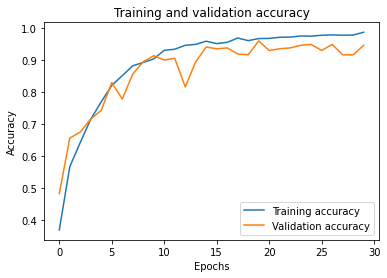

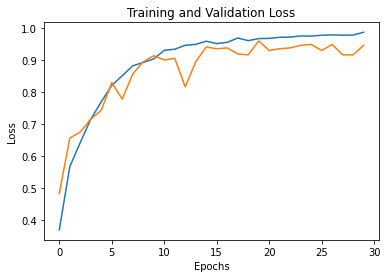

In [214]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot using Seaborn

plt.plot(history.history['accuracy'], label="Training loss")
plt.plot(history.history['val_accuracy'], label="Validation loss")
#my_plot = sns.lineplot(data=history[["loss","validation_loss"]])
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

Testing the model on unseen data
-
- Evaluate method used for testing
- putting the unseen data

In [215]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 32ms/step - loss: 0.3304 - accuracy: 0.9539


[0.33039501309394836, 0.9539295434951782]

In [216]:
import numpy as np
import pandas as pd
y_test.shape


(369, 4)

In [217]:
y_pred = model.predict(X_test, verbose=0)



Confusion matrix
-
- import confusion matrix from sklearn
- predict the model 
- plot the confusion matrix graphs

In [218]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

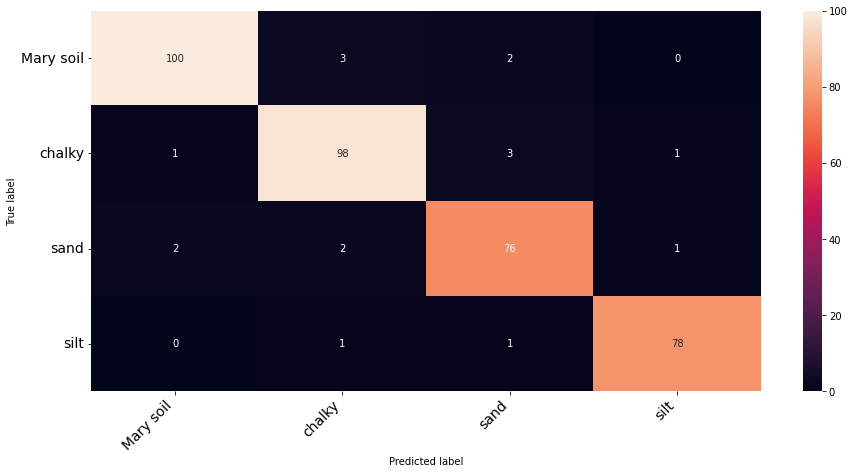

In [219]:
class_names = batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (15,7), fontsize=14)

Creating Classification Report
- 
- import classification report from sklearn
- predicting the value
- 

In [220]:
# From categorical outputs to discrete values

y_pred_ = [np.argmax(y) for y in y_pred]
y_test_ = [np.argmax(y) for y in y_test]

from sklearn.metrics import classification_report
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.94      0.95      0.95       103
           2       0.93      0.94      0.93        81
           3       0.97      0.97      0.97        80

    accuracy                           0.95       369
   macro avg       0.95      0.95      0.95       369
weighted avg       0.95      0.95      0.95       369

